In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
train_data = pickle.load(open("../Modeling/COMBINED_DATA_TRAIN.p","rb"))

In [5]:
nonDataCols = ['page_id', 'article_id']
colsToExclude = []
train_data = train_data.dropna(axis=0)
train_data = train_data.drop(nonDataCols,axis=1)

In [6]:
features = list(train_data.columns[1:23])

In [7]:
def MakeHistogram(df, features, num_bins=100, plot_scale = 4, max_quantile = []):
    num_plots = len(features)
    cols = int(sqrt(num_plots))
    if cols*plot_scale > 16:
        cols = 16//plot_scale
    rows = cols
    while cols * rows < num_plots:
        rows = rows + 1
    fig, ax = subplots(rows, cols, figsize=(plot_scale*cols, plot_scale*rows))
    epa_data = df[df['page_is_ep'] == 1][features]
    nep_data = df[df['page_is_ep'] == 0][features]
    i = 0
    j = 0
    for f in features:
        if len(max_quantile) == 1:
            range_max = df[f].quantile(max_quantile[0])
        elif len(max_quantile) == len(features):
            range_max = df[f].quantile(max_quantile[j * cols + i])
        else:
            range_max = df[f].quantile(1.)
        n_epa = ax[j, i].hist(epa_data[f], label='EP', color='b', alpha=.5, bins=num_bins, range=[0, range_max], \
                              normed=True)
        n_nep = ax[j, i].hist(nep_data[f], label='NEP', color='g', alpha=.5, bins=num_bins, range=[0, range_max], \
                             normed=True)
        ax[j, i].locator_params(nbins=4)
        ax[j, i].set_xlim([0, range_max*1.01])
        if range_max > 1e4:
            ax[j, i].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
        if max(n_epa[0].max(), n_nep[0].max()) < .001:
            ax[j, i].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
        ax[j, i].legend(loc='upper right')
        ax[j, i].set_xlabel(f)
        i = i + 1
        if i == cols:
            i = 0
            j = j + 1

In [24]:
def MakeOneHistogram(df, feature, feature_name, title, num_bins=100, plot_scale = 4, max_quantile = 1., yrange = []):
    fig = plt.figure(num=None, figsize=(5,5), dpi=80, facecolor='w', edgecolor='k')
    epa_data = df[df['page_is_ep'] == 1][features]
    nep_data = df[df['page_is_ep'] == 0][features]
    range_max = df[feature].quantile(max_quantile)
    n_epa = plt.hist(epa_data[feature], label='EP', color='b', alpha=.5, bins=num_bins, range=[0, range_max], \
                          normed=True)
    n_nep = plt.hist(nep_data[feature], label='NEP', color='g', alpha=.5, bins=num_bins, range=[0, range_max], \
                         normed=True)
    plt.locator_params(nbins=4)
    plt.xlim([0, range_max*1.01])
    if range_max > 1e6:
        plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    if max(n_epa[0].max(), n_nep[0].max()) < .001:
        plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    plt.legend(loc='upper right')
    plt.xlabel(feature_name, size=21)
    plt.xticks(size=19)
    plt.yticks(size=19)
    plt.title(title,size=23)
    if len(yrange) == 2:
        plt.ylim(yrange)

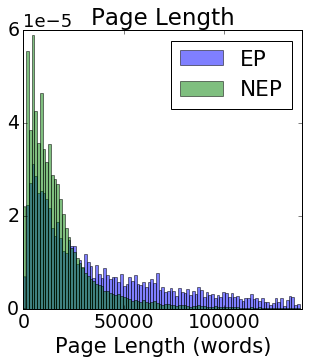

In [25]:
MakeOneHistogram(train_data, 'page_len', 'Page Length (words)', 'Page Length', max_quantile=.99)

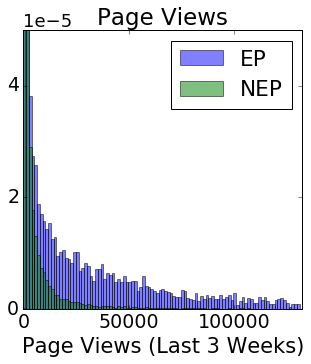

In [26]:
MakeOneHistogram(train_data, 'pageviews', 'Page Views (Last 3 Weeks)', 'Page Views', max_quantile=.99, yrange=[0, .00005])

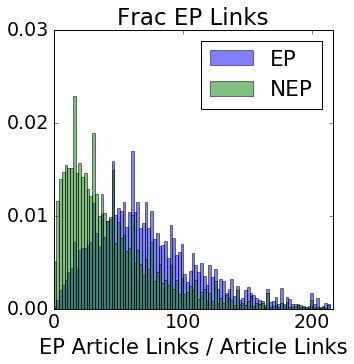

In [27]:
MakeOneHistogram(train_data, 'ratio', 'EP Article Links / Article Links', 'Frac EP Links', max_quantile=.99, yrange=[])

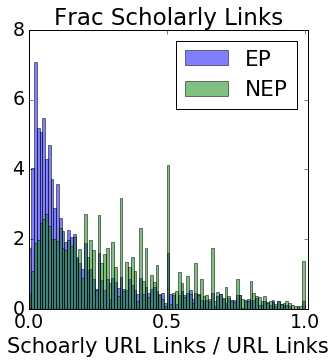

In [28]:
MakeOneHistogram(train_data, 'frac_scholarly', 'Schoarly URL Links / URL Links', 'Frac Scholarly Links', max_quantile=1., yrange=[])

(0, 6e-05)

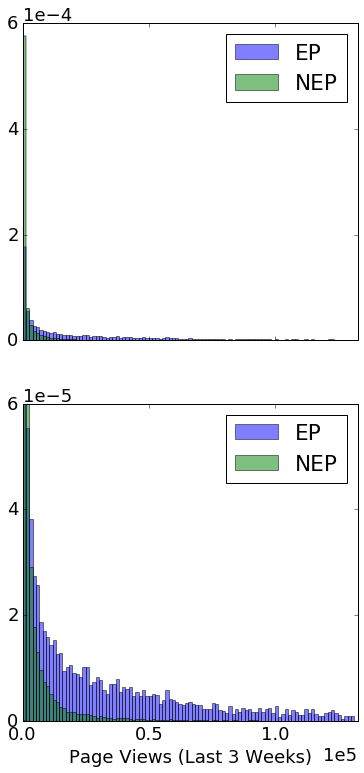

In [74]:
f = 'pageviews'
num_bins = 100
fig, ax = subplots(2, 1, figsize=(6, 12.5), sharex=True)
epa_data = train_data[train_data['page_is_ep'] == 1][features]
nep_data = train_data[train_data['page_is_ep'] == 0][features]
range_max = train_data[f].quantile(.99)
n_epa = ax[0].hist(epa_data[f], label='EP', color='b', alpha=.5, bins=num_bins, range=[0, range_max], \
                      normed=True)
n_nep = ax[0].hist(nep_data[f], label='NEP', color='g', alpha=.5, bins=num_bins, range=[0, range_max], \
                     normed=True)
ax[0].locator_params(nbins=4)
ax[0].set_xlim([0, range_max*1.01])
if range_max > 1e4:
    ax[0].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
if max(n_epa[0].max(), n_nep[0].max()) < .001:
    ax[0].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax[0].legend(loc='upper right')
n_epa = ax[1].hist(epa_data[f], label='EP', color='b', alpha=.5, bins=num_bins, range=[0, range_max], \
                      normed=True)
n_nep = ax[1].hist(nep_data[f], label='NEP', color='g', alpha=.5, bins=num_bins, range=[0, range_max], \
                     normed=True)
ax[1].locator_params(nbins=4)
ax[1].set_xlim([0, range_max*1.01])
if range_max > 1e4:
    ax[1].ticklabel_format(style='sci', axis='x', scilimits=(0,0))
if max(n_epa[0].max(), n_nep[0].max()) < .001:
    ax[1].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax[1].legend(loc='upper right')
ax[1].set_xlabel('Page Views (Last 3 Weeks)')
ax[1].set_ylim([0, 6e-5])